<a href="https://colab.research.google.com/github/athirasivadas94-glitch/DSwithGenAI_Module2/blob/main/Module2_End_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

As a culminating project, you'll be working with a dataset from ABC company,
consisting of 458 rows and 9 columns. The company requires a comprehensive
report detailing information about their employees across various teams. Your
tasks include preprocessing the dataset, analyzing the data, and presenting your
findings graphically.

**Preprocessing:**

Correct the data in the "height" column by replacing it with random
numbers between 150 and 180. Ensure data consistency and integrity
before proceeding with analysis.

In [12]:
import pandas as pd
import numpy as np

# Load dataset
data = pd.read_excel("ABC Company.xlsx")
#data

# Data Correction_Replace height with random numbers between 150 and 180.
data['Height'] = np.random.randint(150, 181, size=len(data))
#data

#Checking for null values
data.isnull().sum() # College(84) and Salary(11) has null values
#data



,0
Name,0
Team,0
Number,0
Position,0
Age,0
Height,0
Weight,0
College,84
Salary,11


**Analysis Tasks & Graphical Representation**

1.Determine the distribution of employees across each team and calculate
the percentage split relative to the total number of employees.

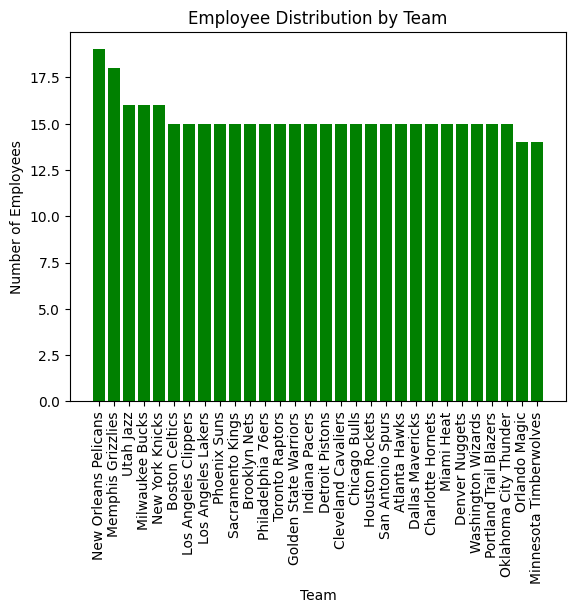

In [21]:
import matplotlib.pyplot as plt

# Total number of employees
total_employees = len(data)

# Employee count per team
team_count = data['Team'].value_counts()

#Bar Plot
plt.bar(team_count.index, team_count.values, color='green')

# Add titles and labels
plt.title('Employee Distribution by Team')
plt.xlabel('Team')
plt.ylabel('Number of Employees')
plt.xticks(rotation=90)
plt.show()

# Percentage split
team_percentage = (team_count / total_employees) * 100



Pie Chart

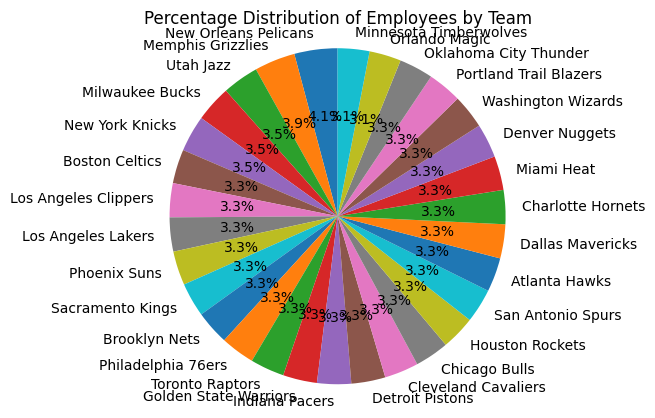

In [24]:
#Pie Chart

plt.pie(
    team_count.values,
    labels=team_count.index,
    autopct='%1.1f%%',
    startangle=90
)

plt.title('Percentage Distribution of Employees by Team')
plt.axis('equal')  # Makes the pie chart circular
plt.show()

2.Segregate employees based on their positions within the company

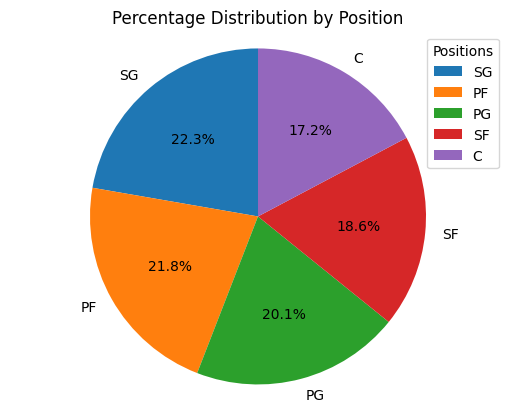

In [29]:
# Count employees by position
position_count = data['Position'].value_counts()

position_count

#Pie Chart
plt.figure()
plt.pie(
    position_count.values,
    labels=position_count.index,
    autopct='%1.1f%%',
    startangle=90
)
plt.legend(
    position_count.index,
    title="Positions",
    loc="best"
)
plt.title('Percentage Distribution by Position')
plt.axis('equal')
plt.show()

3.Identify the predominant age group among employees

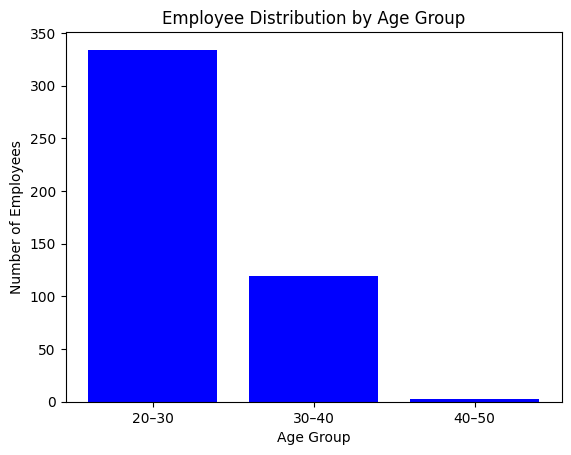

In [35]:
# Define age bins and labels
bins = [20, 30, 40, 50]      # age ranges
labels = ['20–30', '30–40', '40–50']

# Create a new column 'AgeGroup'
data['AgeGroup'] = pd.cut(data['Age'], bins=bins, labels=labels, right=False)

# Count employees per age group
age_group_count = data['AgeGroup'].value_counts().sort_index()

age_group_count

plt.figure()
plt.bar(age_group_count.index, age_group_count.values, color='blue')

plt.title('Employee Distribution by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Employees')

plt.show()

4.Discover which team and position have the highest salary expenditure.

In [37]:
#Salary by Team

# Sum of salaries per team
team_salary = data.groupby('Team')['Salary'].sum().sort_values(ascending=False)

# Team with the highest salary expenditure
highest_team = team_salary.idxmax()
highest_team_salary = team_salary.max()

print(f"Team with highest salary expenditure: {highest_team} (${highest_team_salary})")

Team with highest salary expenditure: Cleveland Cavaliers ($106988689.0)


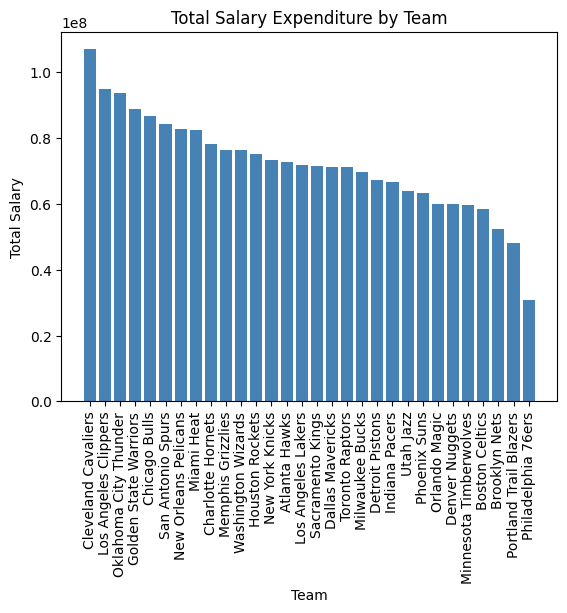

In [39]:
plt.bar(team_salary.index, team_salary.values, color='steelblue')
plt.title('Total Salary Expenditure by Team')
plt.xlabel('Team')
plt.ylabel('Total Salary')
plt.xticks(rotation=90)
plt.show()

In [40]:
# Salary by position

# Sum of salaries per position
position_salary = data.groupby('Position')['Salary'].sum().sort_values(ascending=False)

# Position with the highest salary expenditure
highest_position = position_salary.idxmax()
highest_position_salary = position_salary.max()

print(f"Position with highest salary expenditure: {highest_position} (${highest_position_salary})")

Position with highest salary expenditure: C ($466377332.0)


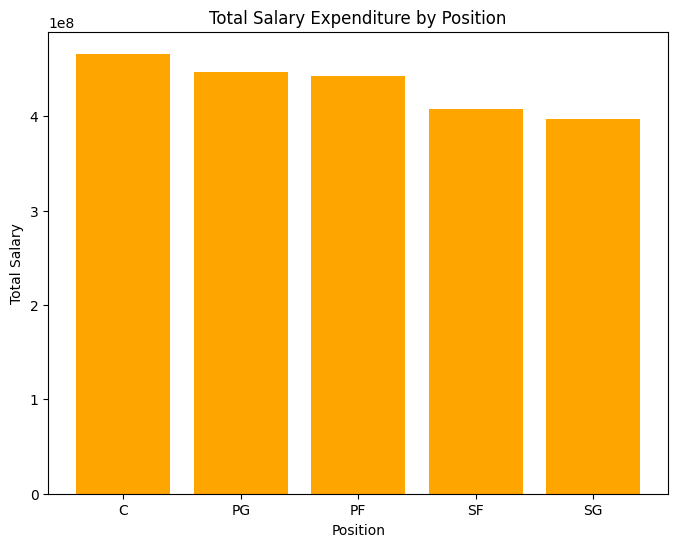

In [44]:
plt.figure(figsize=(8,6))
plt.bar(position_salary.index, position_salary.values, color='orange')
plt.title('Total Salary Expenditure by Position')
plt.xlabel('Position')
plt.ylabel('Total Salary')
plt.show()


5.Investigate if there's any correlation between age and salary, and
represent it visually

In [51]:
# Pearson correlation between Age and Salary
correlation = data['Age'].corr(data['Salary'])
print(f"Correlation between Age and Salary: {correlation:.2f}")
correlation


np.float64(0.21400941226570971)

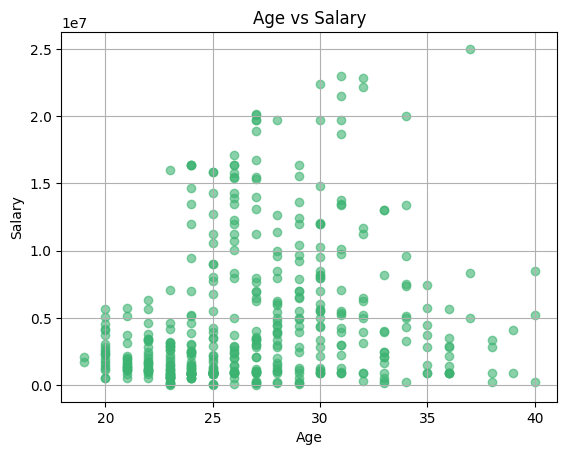

In [48]:
plt.scatter(data['Age'], data['Salary'], color='mediumseagreen', alpha=0.6)

plt.title('Age vs Salary')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.grid(True)
plt.show()

**Data Story:**
Provide insights gained from the analysis, highlighting key
trends, patterns, and correlations within the dataset